In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.transforms import ScaledTranslation
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle, ConnectionPatch

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean

In [2]:
def setup_axes(ax, res='110m'):
    ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=2)
    ax.coastlines(resolution=res, color='black', lw=2)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')


def label_ax(ax, label, position='top', fontsize=16):
    if position == 'inside':
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=fontsize, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='k', pad=3.0))
    elif position == 'top':
        ax.text(
            0.0, 1.0, label, transform=(
                ax.transAxes + ScaledTranslation(7/72, +3/72, fig.dpi_scale_trans)),
            fontsize=fontsize, va='bottom', fontfamily='sans-serif')

In [3]:
data_fold = '../final_data'
grid = xr.open_dataset(f'{data_fold}/POP_gx1v7.nc')
fig1a_data = xr.open_dataarray(f'{data_fold}/fig1a.nc')
fig1b_data = xr.open_dataarray(f'{data_fold}/fig1b.nc')
fig1c_data = xr.open_dataarray(f'{data_fold}/fig1c.nc')
fig1d_data = xr.open_dataarray(f'{data_fold}/fig1d.nc')
fig1ef_data = xr.open_dataset(f'{data_fold}/fig1ef.nc')

In [4]:
data0 = xr.where(fig1ef_data['fcst_clus_id']>0, fig1ef_data['fcst_clus_id'], np.nan)
data1 = xr.where(fig1ef_data['fcst_clus_id']<0, True, np.nan)
data2 = xr.where(fig1ef_data['obs_clus_id']>0, True, False)
data3 = xr.where(fig1ef_data['obs_clus_id']<0, True, False)

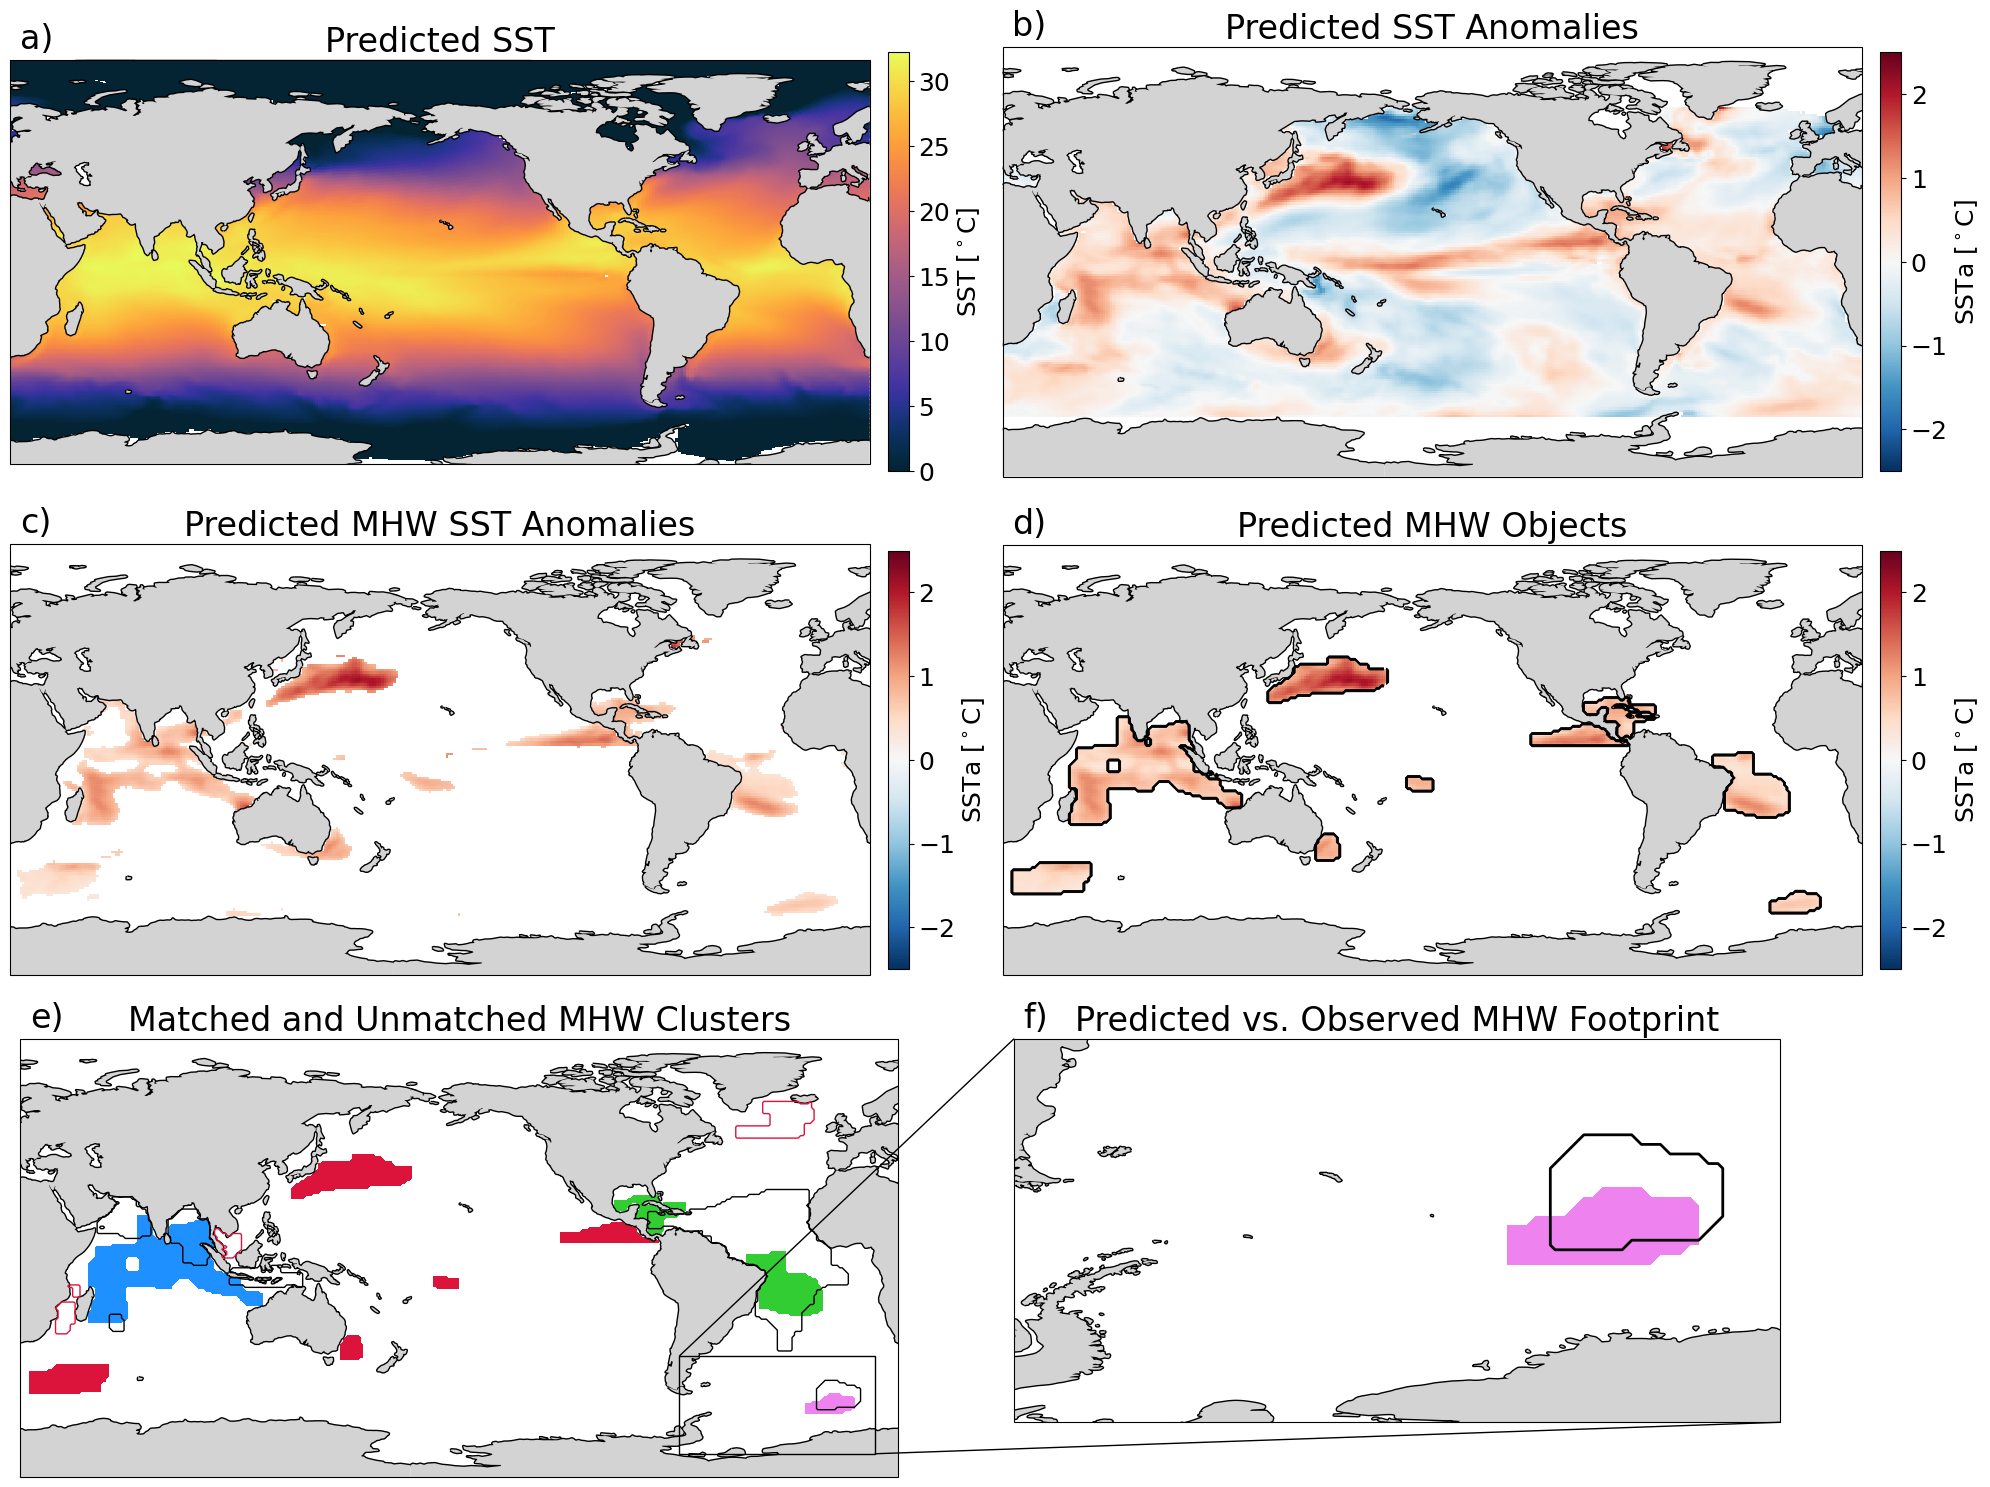

In [7]:
label_pos = 'top'
labelsize = 24
cbarsize = 18
data = [
    fig1a_data,
    fig1b_data,
    fig1c_data,
    fig1d_data,
]
cmaps = [cmocean.cm.thermal, 'RdBu_r', 'RdBu_r', 'RdBu_r']
# levels = [np.linspace(0, 32, 100), np.linspace(-2.5, 2.5, 26), np.linspace(-2.5, 2.5, 26), np.linspace(-2.5, 2.5, 26)]
clabels = [r'SST [$^\circ$C]', r'SSTa [$^\circ$C]', r'SSTa [$^\circ$C]', r'SSTa [$^\circ$C]']
labels = [
    'a)',
    'b)',
    'c)',
    'd)',
    'e)',
    'f)'
]

fig, axs = plt.subplots(3, 2, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree(200)})
for i, ax in enumerate(axs.flatten()):
    if i == 0:
        setup_axes(ax)
        im = ax.pcolormesh(grid.TLONG, grid.TLAT, data[i], transform=ccrs.PlateCarree(), cmap=cmaps[i], vmin=0)
        cbar = plt.colorbar(im, ax=ax, fraction=0.0233, pad=0.02)
        cbar.set_label(label=clabels[i], size=cbarsize)
        cbar.ax.tick_params(labelsize=cbarsize)
        label_ax(ax, labels[i], label_pos, fontsize=labelsize)
    elif i in list(range(1, 4)):
        setup_axes(ax)
        im = ax.pcolormesh(data[i].lon, data[i].lat, data[i], transform=ccrs.PlateCarree(), cmap=cmaps[i], vmin=-2.5, vmax=2.5)
        cbar = plt.colorbar(im, ax=ax, fraction=0.0233, pad=0.02)
        cbar.set_label(label=clabels[i], size=cbarsize)
        cbar.ax.tick_params(labelsize=cbarsize)
        label_ax(ax, labels[i], label_pos, fontsize=labelsize)
axs[1, 1].contour(data[3].lon, data[3].lat, xr.where(~np.isnan(data[3]), 1, 0), transform=ccrs.PlateCarree(), colors=['k'], linewidths=0.6)

# Plot panel e) 
setup_axes(axs[2, 0])
label_ax(axs[2, 0], 'e)', label_pos, fontsize=labelsize)

CMap = ListedColormap(['limegreen', 'dodgerblue', 'violet'])
CMapbad = ListedColormap(['crimson'], N=10)
im0 = axs[2, 0].contourf(data0.lon, data0.lat, data0, transform=ccrs.PlateCarree(), cmap=CMap)
im1 = axs[2, 0].contourf(data1.lon, data1.lat, data1, transform=ccrs.PlateCarree(), cmap=CMapbad, vmin=0, vmax=1.3)
im2 = axs[2, 0].contour(data2.lon, data2.lat, data2, transform=ccrs.PlateCarree(), colors='k', linewidths=1)
im3 = axs[2, 0].contour(data3.lon, data3.lat, data3, transform=ccrs.PlateCarree(), colors='crimson', linewidths=1)
plt.tight_layout()

# Create and plot panel f)
lons=[290, 370]
lats = [-80, -40]
axs[2, 0].add_patch(mpatches.Rectangle(xy=[lons[0], lats[0]], width=np.diff(lons)[0], height=np.diff(lats)[0],
                                facecolor='none', edgecolor='k',
                                transform=ccrs.PlateCarree(), zorder=6))
l, b, w, h = axs[2, 1].get_position().bounds
axs[2, 1].remove()
axf = plt.subplot(326, projection=ccrs.PlateCarree(330))
axf.set_position([l, b+h/8, w*7/8, h*7/8])
setup_axes(axf, res='50m')
axf.set_extent([lons[0], lons[1], lats[0], lats[1]], crs=ccrs.PlateCarree())
im0 = axf.contourf(data0.lon, data0.lat, data0, transform=ccrs.PlateCarree(), cmap=CMap)
im2 = axf.contour(data2.lon, data2.lat, data2, transform=ccrs.PlateCarree(), colors='k', linewidths=2)
label_ax(axf, 'f)', label_pos, fontsize=labelsize)

# Connect e) and f)
topleftA = ccrs.PlateCarree(200).transform_point(lons[0], lats[1], ccrs.PlateCarree())
topleftB = ccrs.PlateCarree(330).transform_point(lons[0], lats[1], ccrs.PlateCarree())
bottomrightA = ccrs.PlateCarree(200).transform_point(lons[1], lats[0], ccrs.PlateCarree())
bottomrightB = ccrs.PlateCarree(330).transform_point(lons[1], lats[0], ccrs.PlateCarree())
con = ConnectionPatch(xyA=topleftA, xyB=topleftB, coordsA=axs[2, 0].transData, coordsB=axf.transData, color='k')
con1 = ConnectionPatch(xyA=bottomrightA, xyB=bottomrightB, coordsA=axs[2, 0].transData, coordsB=axf.transData, color='k')
fig.add_artist(con)
fig.add_artist(con1)

# Title Plots
axs[0, 0].set_title('Predicted SST', fontsize=labelsize)
axs[0, 1].set_title('Predicted SST Anomalies', fontsize=labelsize)
axs[1, 0].set_title('Predicted MHW SST Anomalies', fontsize=labelsize)
axs[1, 1].set_title('Predicted MHW Objects', fontsize=labelsize)
axs[2, 0].set_title('Matched and Unmatched MHW Clusters', fontsize=labelsize)
axf.set_title('Predicted vs. Observed MHW Footprint', fontsize=labelsize)

plt.show()